# Welcome to the first SimpleITK Notebook demo:
# SimpleITK Image Basics

本文档将简要介绍SimpleITK Image类。 首先，我们导入SimpleITK Python模块。按照惯例，我们的模块被导入更短和更Pythonic“sitk”本地名称。


In [3]:
from __future__ import print_function
%matplotlib inline
import matplotlib.pyplot as plt
import SimpleITK as sitk


## Image Construction

有多种方法可以创建图像。所有图像的初始值都很好地定义为零。

In [4]:
image = sitk.Image(256, 128, 64, sitk.sitkInt16)
image_2D = sitk.Image(32, 64, sitk.sitkFloat32)
image_2D = sitk.Image([32,64], sitk.sitkUInt32)
image_RGB = sitk.Image([128,256], sitk.sitkVectorUInt8, 3)

### Pixel Types

像素类型表示为枚举类型。以下是枚举列表的表。

<table>
  <tr><td>sitkUInt8</td><td>Unsigned 8 bit integer</td></tr>
  <tr><td>sitkInt8</td><td>Signed 8 bit integer</td></tr>
  <tr><td>sitkUInt16</td><td>Unsigned 16 bit integer</td></tr>
  <tr><td>sitkInt16</td><td>Signed 16 bit integer</td></tr>
  <tr><td>sitkUInt32</td><td>Unsigned 32 bit integer</td></tr>
  <tr><td>sitkInt32</td><td>Signed 32 bit integer</td></tr>
  <tr><td>sitkUInt64</td><td>Unsigned 64 bit integer</td></tr>
  <tr><td>sitkInt64</td><td>Signed 64 bit integer</td></tr>
  <tr><td>sitkFloat32</td><td>32 bit float</td></tr>
  <tr><td>sitkFloat64</td><td>64 bit float</td></tr>
  <tr><td>sitkComplexFloat32</td><td>complex number of 32 bit float</td></tr>
  <tr><td>sitkComplexFloat64</td><td>complex number of 64 bit float</td></tr>
  <tr><td>sitkVectorUInt8</td><td>Multi-component of unsigned 8 bit integer</td></tr>
  <tr><td>sitkVectorInt8</td><td>Multi-component of signed 8 bit integer</td></tr>
  <tr><td>sitkVectorUInt16</td><td>Multi-component of unsigned 16 bit integer</td></tr>
  <tr><td>sitkVectorInt16</td><td>Multi-component of signed 16 bit integer</td></tr>
  <tr><td>sitkVectorUInt32</td><td>Multi-component of unsigned 32 bit integer</td></tr>
  <tr><td>sitkVectorInt32</td><td>Multi-component of signed 32 bit integer</td></tr>
  <tr><td>sitkVectorUInt64</td><td>Multi-component of unsigned 64 bit integer</td></tr>
  <tr><td>sitkVectorInt64</td><td>Multi-component of signed 64 bit integer</td></tr>
  <tr><td>sitkVectorFloat32</td><td>Multi-component of 32 bit float</td></tr>
  <tr><td>sitkVectorFloat64</td><td>Multi-component of 64 bit float</td></tr>
  <tr><td>sitkLabelUInt8</td><td>RLE label of unsigned 8 bit integers</td></tr>
  <tr><td>sitkLabelUInt16</td><td>RLE label of unsigned 16 bit integers</td></tr>
  <tr><td>sitkLabelUInt32</td><td>RLE label of unsigned 32 bit integers</td></tr>
  <tr><td>sitkLabelUInt64</td><td>RLE label of unsigned 64 bit integers</td></tr>
</table>

还有sitkUnknown，用于未定义或错误的像素ID。它的值为-1。 

并非所有发行版都提供64位整数类型。如果不可用，则值为sitkUnknown。


### More Information about the Image class be obtained in the Docstring


SimpleITK类和函数具有源自C ++定义和Doxygen文档的Docstrings。

In [4]:
help(image)

Help on Image in module SimpleITK.SimpleITK object:

class Image(builtins.object)
 |  The Image class for SimpleITK.
 |  
 |  
 |  This Image class can represent 2D, 3D, and 4D images. The pixel types may be a
 |  scalar, a multi-component vector or a run-length-encoded (RLE)
 |  "label". The dimension, pixel type and size is specified at
 |  construction.
 |  
 |  A fundamental concept of ITK images is that they occupy physical space
 |  where the image is defined by an origin, spacing, and direction cosine
 |  matrix. The attributes are taken into consideration when doing most
 |  operations on an image. A meta-data dictionary is also associated with
 |  the image, which may contain additional fields from reading but these
 |  attributes are not propagated by image filters.
 |  
 |  The SimpleITK Image provides a single facade interface to several ITK image types.
 |  Internally, the SimpleITK Image maintains a pointer to the ITK image class, and performs reference
 |  counting and l

## Accessing Attributes

如果您熟悉ITK，那么这些方法将遵循您的期望：

In [5]:
print(image.GetSize())
print(image.GetOrigin())
print(image.GetSpacing())
print(image.GetDirection())
print(image.GetNumberOfComponentsPerPixel())

(256, 128, 64)
(0.0, 0.0, 0.0)
(1.0, 1.0, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
1


注意：SimpleITK图像的起始索引始终为0.如果ITK过滤器的输出具有非零起始索引，则索引将设置为0，并相应地调整原点。 

图像尺寸的大小具有显式访问者：

**3D图像: GetSize()获取到的元组:(Width,Height,Depth)**

In [6]:
print(image.GetWidth())
print(image.GetHeight())
print(image.GetDepth())

256
128
64


由于SimpleITK图像的维度和像素类型是在运行时确定的，因此需要访问器。

In [7]:
print(image.GetDimension())
print(image.GetPixelIDValue())
print(image.GetPixelIDTypeAsString())

3
2
16-bit signed integer


What is the depth of a 2D image?
**2D图像: GetSize()获取到的元组:(Width,Height)**

In [11]:
print(image_2D.GetSize())
print(image_2D.GetWidth())
print(image_2D.GetHeight())
print(image_2D.GetDepth())

(32, 64)
32
64
0


矢量图像的尺寸和大小是多少？

In [12]:
print(image_RGB.GetDimension())
print(image_RGB.GetSize())

2
(128, 256)


In [13]:
print(image_RGB.GetNumberOfComponentsPerPixel())

3


对于某些文件类型（如DICOM），有关图像的其他信息包含在元数据字典中。

In [14]:
for key in image.GetMetaDataKeys():
        print("\"{0}\":\"{1}\"".format(key, image.GetMetaData(key)))

## Accessing Pixels

有成员函数GetPixel和SetPixel，它为像素访问提供类似ITK的接口。

In [16]:
help(image.GetPixel)
help(image.SetPixel)

Help on method GetPixel in module SimpleITK.SimpleITK:

GetPixel(*idx) method of SimpleITK.SimpleITK.Image instance
    Returns the value of a pixel.
    
    This method takes 2 parameters in 2D: the x and y index,
    and 3 parameters in 3D: the x, y and z index.

Help on method SetPixel in module SimpleITK.SimpleITK:

SetPixel(*args) method of SimpleITK.SimpleITK.Image instance
    Sets the value of a pixel.
    
    This method takes 3 parameters in 2D: the x and y index then the value,
    and 4 parameters in 3D: the x, y and z index then the value.



In [17]:
print(image.GetPixel(0, 0, 0))
image.SetPixel(0, 0, 0, 1)
print(image.GetPixel(0, 0, 0))

0
1


In [18]:
print(image[0,0,0])
image[0,0,0] = 10
print(image[0,0,0])

1
10


## Conversion between numpy and SimpleITK

In [5]:
nda = sitk.GetArrayFromImage(image)
print(nda)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [6]:
help(sitk.GetArrayFromImage)

Help on function GetArrayFromImage in module SimpleITK.SimpleITK:

GetArrayFromImage(image)
    Get a NumPy ndarray from a SimpleITK Image.
    
    This is a deep copy of the image buffer and is completely safe and without potential side effects.



In [7]:
# Get a view of the image data as a numpy array, useful for display
nda = sitk.GetArrayViewFromImage(image)

In [8]:
nda = sitk.GetArrayFromImage(image_RGB)
img = sitk.GetImageFromArray(nda)
img.GetSize()

(3, 128, 256)

In [9]:
help(sitk.GetImageFromArray)

Help on function GetImageFromArray in module SimpleITK.SimpleITK:

GetImageFromArray(arr, isVector=None)
    Get a SimpleITK Image from a numpy array. If isVector is True, then the Image will have a Vector pixel type, and the last dimension of the array will be considered the component index. By default when isVector is None, 4D images are automatically considered 3D vector images.



In [10]:
img = sitk.GetImageFromArray(nda, isVector=True)
print(img)

VectorImage (00000265BFC38AD0)
  RTTI typeinfo:   class itk::VectorImage<unsigned char,2>
  Reference Count: 1
  Modified Time: 803
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 0
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [128, 256]
  BufferedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [128, 256]
  RequestedRegion: 
    Dimension: 2
    Index: [0, 0]
    Size: [128, 256]
  Spacing: [1, 1]
  Origin: [0, 0]
  Direction: 
1 0
0 1

  IndexToPointMatrix: 
1 0
0 1

  PointToIndexMatrix: 
1 0
0 1

  Inverse Direction: 
1 0
0 1

  VectorLength: 3
  PixelContainer: 
    ImportImageContainer (00000265C2F29FF0)
      RTTI typeinfo:   class itk::ImportImageContainer<unsigned __int64,unsigned char>
      Reference Count: 1
      Modified Time: 804
      Debug: Off
      Object Na

## The order of index and dimensions need careful attention during conversion

ITK的image类没有括号运算符。它有一个GetPixel以ITK索引对象作为参数,顺序为(x, y, z)。这是SimpleITK的Image类用于GetPixel方法和切片运算符的约定。 在numpy中，数组以**相反的**顺序``（z，y，x）``编入索引。 另请注意，对通道的访问是不同的。 **在SimpleITK中，您不可以直接访问通道**，而是返回表示特定像素的所有通道的像素值，然后您可以访问该像素的通道。 **在numpy数组中，您将直接访问该通道。**

总结:

- ITK 的image类位置索引顺序(W,H)/(W,H,D)与其对应的numpy数组位置索引顺序(H,W)/(D,H,W)相反
- ITK 的image类不可以直接访问通道，需要先获取索引位置再访问通道，在numpy数组中，您将直接访问该通道

In [11]:
import numpy as np

multi_channel_3Dimage = sitk.Image([2,4,8], sitk.sitkVectorFloat32, 5)
x = multi_channel_3Dimage.GetWidth() - 1
y = multi_channel_3Dimage.GetHeight() - 1
z = multi_channel_3Dimage.GetDepth() - 1

multi_channel_3Dimage[x,y,z] = np.random.random(multi_channel_3Dimage.GetNumberOfComponentsPerPixel())

nda = sitk.GetArrayFromImage(multi_channel_3Dimage)

print("Image size: " + str(multi_channel_3Dimage.GetSize()))
print("Numpy array size: " + str(nda.shape))

# Notice the index order and channel access are different:
print("First channel value in image: " + str(multi_channel_3Dimage[x,y,z][0]))
print("First channel value in numpy array: " + str(nda[z,y,x,0]))

Image size: (2, 4, 8)
Numpy array size: (8, 4, 2, 5)
First channel value in image: 0.1479833424091339
First channel value in numpy array: 0.14798334



### Are we still dealing with Image, because I haven't seen one yet...

虽然SimpleITK不进行可视化，但它确实包含内置的Show方法。 此函数将图像写入磁盘，然后启动程序以进行可视化。 默认情况下，它配置为使用ImageJ，因为它很容易支持SimpleITK具有的所有图像类型并且加载速度非常快。 但是，它可以通过设置环境变量轻松定制。

In [12]:
sitk.Show(image)

RuntimeError: Exception thrown in SimpleITK Show: C:\d\VS14-Win64-pkg\SimpleITK\Code\IO\src\sitkShow.cxx:495:
sitk::ERROR: No appropriate executable found.

In [13]:
sitk.Show?

By converting into a numpy array, matplotlib can be used for visualization for integration into the scientific python environment.

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

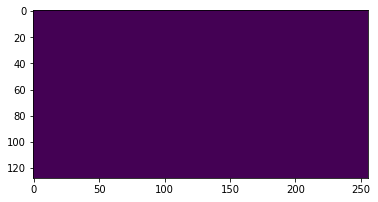

In [18]:
z = 0
slice = sitk.GetArrayViewFromImage(image)[z,:,:]
plt.imshow(slice)